# Assignment 3 

## Objective

The goal is to investigate supervised learning algorithms for article classification on BBC news datasets using NB, kNN, SVM, and NNs. 

## Task 1: Exploratory Data Analytics

### (a) Feature vectorization and summary table

In [3]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('train.csv')

# df info
print(df.head(), '\n') # glimpse first few rows
print(df.shape, '\n') # 1000 rows, 3 columns
print(df.info(), '\n') # no missing values 
print(df['Category'].value_counts()) # even distribution of categories


   ArticleId                                               Text       Category
0       1976  lifestyle governs mobile choice faster better ...           tech
1       1797  french honour director parker british film dir...  entertainment
2       1866  fockers fuel festive film chart comedy meet fo...  entertainment
3       1153  housewives lift channel 4 ratings debut us tel...  entertainment
4        342  u2 desire number one u2 three prestigious gram...  entertainment 

(428, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  428 non-null    int64 
 1   Text       428 non-null    object
 2   Category   428 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.2+ KB
None 

Category
tech             216
entertainment    212
Name: count, dtype: int64


In [4]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text']) # USE X_tfidf FOR MODEL BUILDING

# Print num articles and features
print("Number of articles:", X_tfidf.shape[0])
print("Number of features (unique words):", X_tfidf.shape[1])

# Show features for 5 articles
feature_names = tfidf_vectorizer.get_feature_names_out()
sample_df = pd.DataFrame(
    X_tfidf[:5].toarray(),
    columns=feature_names[:]
)
sample_df['ArticleId'] = df['ArticleId'][:5].values
sample_df['Category'] = df['Category'][:5].values

print("\nSample of 5 articles with TF-IDF features (first 10 shown):\n")
print(sample_df)

Number of articles: 428
Number of features (unique words): 13518

Sample of 5 articles with TF-IDF features (first 10 shown):

    00       000  000th  001st  0051  007  0100  0130  028   05  ...  zombies  \
0  0.0  0.020115    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
1  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
2  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
3  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
4  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   

   zone  zonealarm  zones  zoom  zooms   zooropa  zorro  ArticleId  \
0   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1976   
1   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1797   
2   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1866   
3   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1153   
4   0.0        0.0    0.0   0.0    0

Explanation:

We use `TfidfVectorizer` to convert the news articles into numerical feature vectors based on the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme. TF-IDF computes a value for each word in each article based on how frequently the word appears in that article (term frequency) and how rare it is across the entire dataset (inverse document frequency). This helps highlight words that are important for distinguishing one article from another, while down-weighting common words that appear across most documents. 

We choose TF-IDF for model building because it generally improves the performance of classification algorithms like Naive Bayes, kNN, SVM, and Neural Networks by emphasizing informative, distinguishing words. We used TF-IDF in task 1a so that our feature vectors match what will be used by our classifiers. 

However, in task 1b, we use `CountVectorizer` (which gives simple word occurrence counts) for term frequency analysis and plots. This is because term frequency plots are most meaningful when they show raw counts of how often each word appears, which is standard for exploratory data analysis of text. 

Note that news bodies were lower-cased with removal of stop words and special characters, so we do not have to do any further data preprocessing. 

### (b) Term Frequency Analysis and Plots (Counts)


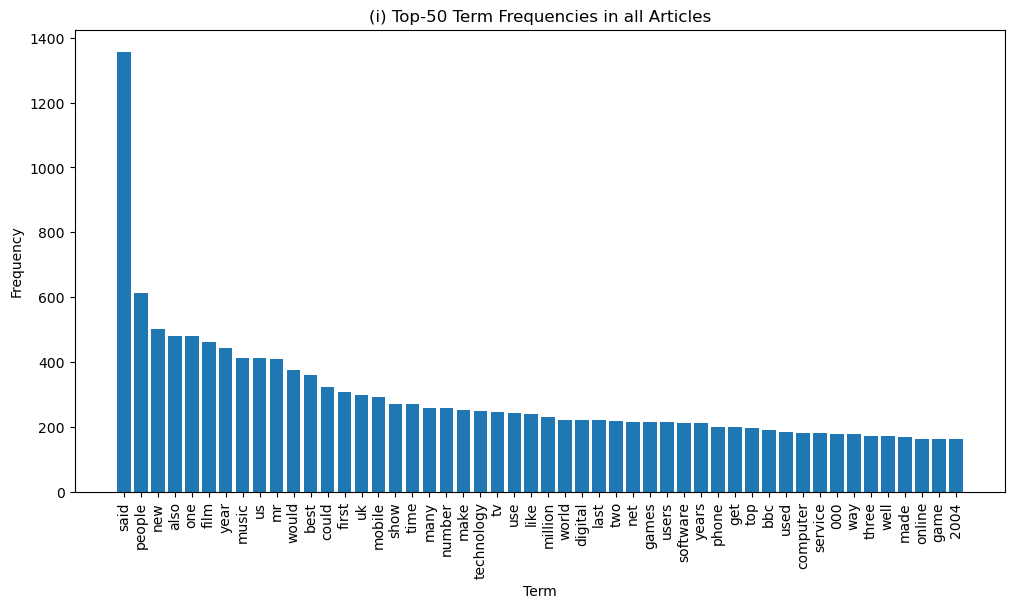

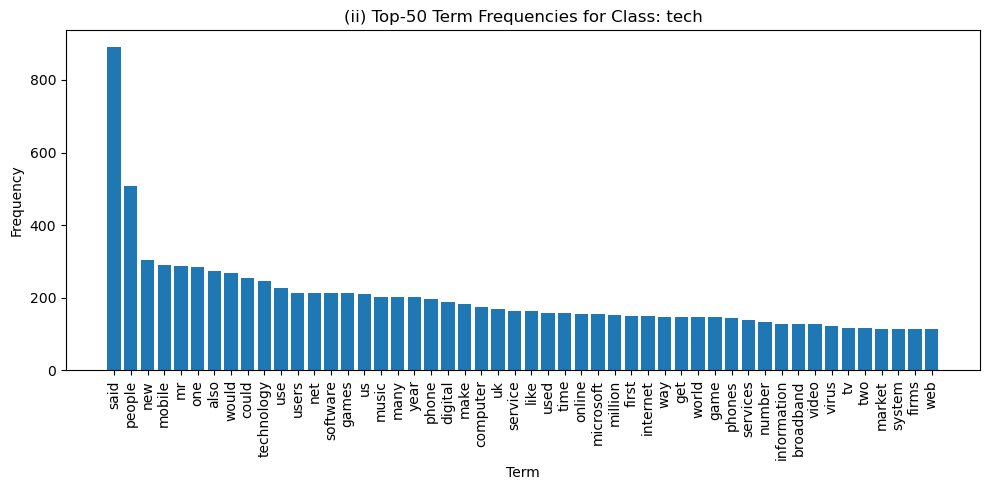

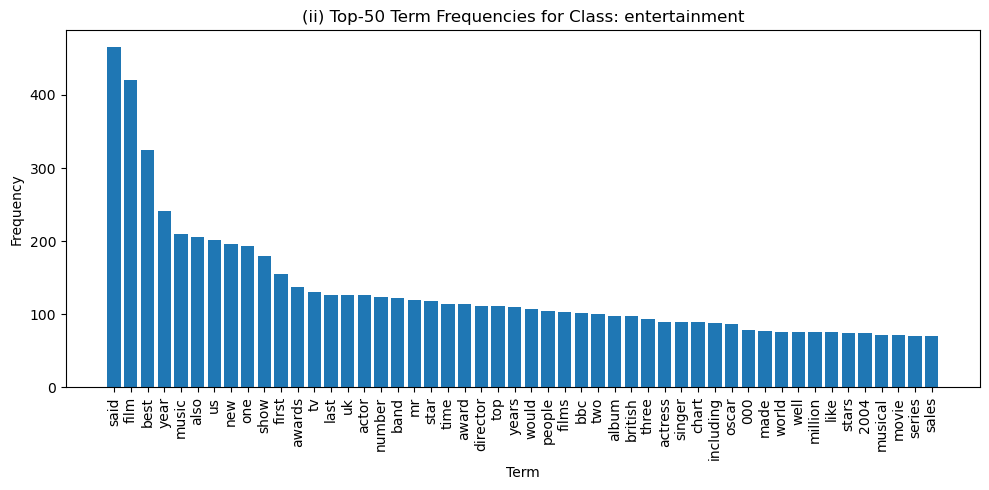

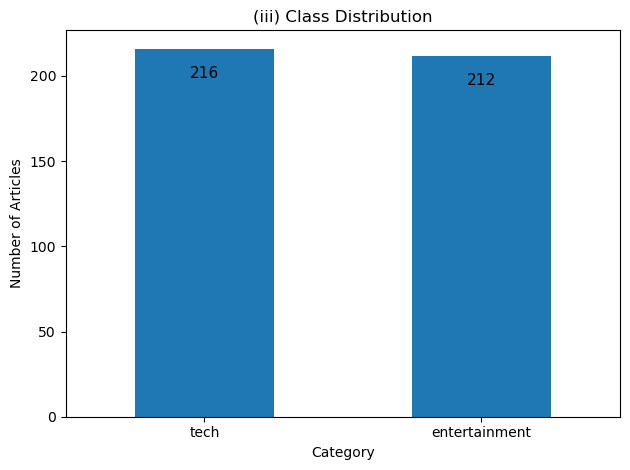

In [5]:
# Raw counts
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(df['Text'])
word_counts = X_counts.sum(axis=0).A1
terms = count_vectorizer.get_feature_names_out()

### i) Top-50 term distribution
top_50_indices = word_counts.argsort()[::-1][:50]
top_50_terms = terms[top_50_indices]
#print(top_50_terms)
top_50_counts = word_counts[top_50_indices]
#print(top_50_counts)
plt.figure(figsize=(12, 6))
plt.bar(top_50_terms, top_50_counts)
plt.xticks(rotation=90)
plt.title("(i) Top-50 Term Frequencies in all Articles")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.tight_layout
plt.show()

### ii) Term frequency per class
for cat in df['Category'].unique():
    mask = (df['Category'] == cat).values
    class_counts = X_counts[mask].sum(axis=0).A1
    top_50_indices = class_counts.argsort()[::-1][:50]
    plt.figure(figsize=(10, 5))
    plt.bar(terms[top_50_indices], class_counts[top_50_indices])
    plt.xticks(rotation=90)
    plt.title(f"(ii) Top-50 Term Frequencies for Class: {cat}")
    plt.xlabel("Term")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
### iii) Class distribution
class_counts = df['Category'].value_counts()
ax = class_counts.plot(kind='bar')
plt.title('(iii) Class Distribution')
plt.ylabel('Number of Articles')
plt.xlabel('Category')
plt.xticks(rotation=0)

# text labels
for i, v in enumerate(class_counts):
    plt.text(
        i, # bar center
        v - 10, # height 
        str(v), # text 
        ha='center', # horiz aligned center
        va='top', # vert aligned top
        fontsize=11
    )
plt.tight_layout()
plt.show()


Comments on the plots:

**(i) Top-50 Term Frequencies in all Articles**
The first plot shows the 50 most frequenct terms across the entire BBC news dataset. Words like "said", "people", and "new" appear at the top, reflecting common themes and reporting styles in the news articles. "Said" is by far the most frequent word, likely because news articles often quote sources or interviewees. While some domain-specific words (such as "music", "film", or "mobile") are present, many frequenct words are common reporting words used in both tech and entertainment articles. 

**(ii) Top-50 Term Frequencies by Class**
- The top terms in tech articles include "mobile", "technology", "users", "software", "games", "phone" etc. which are strongly indicative of technology topics. This suggests that the dataset is well-separated. 

- In contrast, the most frequenct words in entertainment articles are "film", "music", "show", "awards", "actor", "band" etc. which clearly reflects the topics covered in this class. 

While there is some overlap in common words (such as "said", "year", and "tv"), the most distinguishing terms for each class clearly align with their respective domains e.g. "mobile" and "technology" are prominent in tech while "film" and "music" dominate entertainment. 

**(iii) Class distribution**
The final plot shows the distribution of articles by class. The dataset is almost perfectly balanced, with 216 tech articles and 212 entertainment articles. This balanced distribution is advantageous for supervised machine learning, as it will help models learn both classes equally well and prevent bias towards either category. 

## Task 2: Classification Models Learning

### (a) Naive Bayes (NB)

In [6]:
# Code goes here
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model (multinomial)
nb = MultinomialNB()
nb.fit(X_tfidf, df['Category'])


### (i) Top 20 Most Identifiable Words per Class

# Get feature names and class labels
feature_names = tfidf_vectorizer.get_feature_names_out()
class_labels = nb.classes_

top_words = {}
# Get top 20 words for class i, largest log-prob
for i, class_label in enumerate(class_labels):
    top20_idx = np.argsort(nb.feature_log_prob_[i])[::-1][:20]
    top_words[class_label] = feature_names[top20_idx]

# Display
for cls in class_labels:
    print(f"\nTop 20 words most likely to occur in {cls} articles:")
    print(top_words[cls],'\n')
    

### (ii) Top 20 words maximizing the Discriminative Ratio
top_ratio_words = {}
for i, class_label in enumerate(class_labels):
    # Log ratio vs all other classes (as only binary, just the other class)
    log_prob_A = nb.feature_log_prob_[i]
    log_prob_B = nb.feature_log_prob_[1-i]
    log_ratio = log_prob_A - log_prob_B  # log(A/B) = logA - logB
    top20_ratio_idx = np.argsort(log_ratio)[::-1][:20]
    top_ratio_words[class_label] = feature_names[top20_ratio_idx]

# Display:
for cls in class_labels:
    print(f"\nTop 20 discriminative words for {cls} (NB log-ratio):")
    print(top_ratio_words[cls])



Top 20 words most likely to occur in entertainment articles:
['film' 'best' 'said' 'show' 'band' 'music' 'year' 'awards' 'us' 'award'
 'actor' 'album' 'star' 'chart' 'tv' 'also' 'number' 'oscar' 'top' 'new'] 


Top 20 words most likely to occur in tech articles:
['said' 'people' 'mobile' 'software' 'games' 'phone' 'net' 'users'
 'technology' 'mr' 'microsoft' 'virus' 'computer' 'broadband' 'new' 'use'
 'could' 'would' 'digital' 'game'] 


Top 20 discriminative words for entertainment (NB log-ratio):
['film' 'band' 'best' 'actor' 'album' 'chart' 'oscar' 'singer' 'award'
 'actress' 'star' 'musical' 'stars' 'festival' 'comedy' 'awards' 'aviator'
 'theatre' 'rock' 'nominated']

Top 20 discriminative words for tech (NB log-ratio):
['mobile' 'software' 'users' 'microsoft' 'games' 'net' 'technology'
 'virus' 'phone' 'broadband' 'computer' 'phones' 'spam' 'mail' 'firms'
 'use' 'spyware' 'online' 'pc' 'internet']


Explanation of Q2a. 

Here we trained a Naive Bayes (multinomial) classifier on the TF-IDF feature representation of the BBC news articles to classify them as either 'tech' or 'entertainment'. 

(i) displays the 20 words with the highest probability of occurring in each class (P(X_w = 1 | Y = y)) and (ii) displays the top 20 words that maximize the discriminative ratio between the two classes: (P(X_w = 1 | Y= y) / P(X_w = 1 | Y != y)). This equation identifies words that are much more likely to appear in one class than the other. In practice we use the log of this ratio for stability such that, the larger the log-ratio, the more 'distinctive' the word is for that class. 

**Which set of words describes the two classes better?**

The first set for each class (most likely words) contains terms that are highly frequent in that class, but also includes generic reporting terms such as "said" and "new" which are not unique to the topic e.g. the word "said" appears as a top word for both classes, even though it is not specific to tech or entertainment. 

The second set (discriminative log-ratio words) for each class, intead focuses on words that are especially distinctive of each topic. 
- For entertainment, these include domain-specific words such as "film", "band", "actor", "album", "oscar" etc. which are strongly associated with movies and music. 
- For tech, words such as "mobile", "software", "users", "microsoft", "games" etc. clearly relate to technology topics. 

Therefore, the discriminative ratio set better describes and distinguishes each class. These words would be more useful both for human interpretation of class topics and for building classifiers that spearate the two classes. 

### (b) kNN

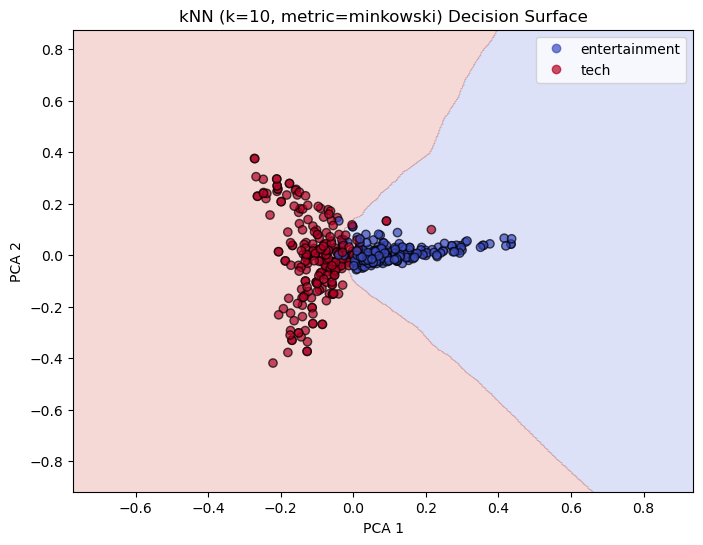

In [24]:
# Code goes here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Set-up TF-IDF features and labels
X = X_tfidf
y = df['Category']
#print(X)
#print(y)
# Label encode y for plotting
le = LabelEncoder()
y_num = le.fit_transform(y) # 'tech' => 1, 'entertainment' => 0
#print(y_num)

# Dimension reduction for visualization: reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# kNN on PCA projection
k = 10 # k is chosen manually for now
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
knn.fit(X_pca, y_num)

# Create mesh
x_min, x_max = X_pca[:, 0].min() - .5, X_pca[:, 0].max() + .5
y_min, y_max = X_pca[:, 1].min() - .5, X_pca[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), # mesh grit
                     np.linspace(y_min, y_max, 500))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # predict on mesh grid
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm) # fill background colour according to predictions
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_num,
                      cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.7) # plot points coloured by class

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'kNN (k={k}, metric={metric}) Decision Surface')
label_vals = np.unique(y_num)
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[le.classes_[i] for i in label_vals]
)
plt.show()

Explanation for Q2b: 

Here, we train a k-nearest neighbours (kNN) classifier with k = 10 and the Euclidean distance metric (Minkowski, p=2) on the BBC articles after projecting the high-dimensional TF-IDF vectors onto the first two principal components using PCA (for visualization purposes). 

In this section, we manually set k=10 for illustration. In Q3 we will tune this hyperparameter and optimize the kNN model's performance. 

The decision sufrace plot above shows the predicted class regions in the 2D PCA space:
- Red region: articles classified as "tech"
- Blue region: articles classified as "entertainment"
Each point corresponds to a projected article, with colour reflecting the true class label. 

**Interpretation:**

The boundary between the two classes is relatively smooth and nonlinear (with k=10 in this case), conforming to the distribution of points in the projected space. The chosen k (number of neighbours) influences the shape of this boundary: 
- Smaller k would make the boundary more jagged and sensitive to noise, possibly resulting in overfitting. 
- Larger k would produce a smootherboundary, potnetially underfitting if too large (as local class details are averaged out). 

The distance metric (Euclidean in this case) determines how 'closeness' is calculated in the feature space, affecting which training samples count as neighbours for each test sample. 

We used PCA to reduce the features to 2D just for visualization. The actual classification model in practice (for performance evaluation) should be trained on all features, not just these two principal components. 

Hence, the kNN boundary adapts flexibly to the underlying data distribution in feature space. The model's sensitivity and ability to separate classes are primarily controlled by the choice of k and the distance metric. These hyperparameters will be tuned for optimization in Q3. 

### (c) SVM

In [8]:
# Code goes here

### (d) NN

In [9]:
# Code goes here

## Task 3: Classification Quality Evaluation

### (a) Training Set Size vs Accuracy

*For each model, we are evaluating how accuracy (F1 score) varies with training set size, and plotting all 4 models' curves on the same pair of plots (training and testing accuracy)*


In [10]:
# Code goes here

### (b) Hyperparameter Impact
*For each model, we are listing the major hyperparameters, assessing their impact (using CV) and comparing them as a set in our discussion*


In [11]:
# Code goes here

### (c) Best Results Comparison
*Here, after tuning, we are reporting and comparing the best performance (F1) of each model and summarizing which works best*